![title](image/regressionBasic1.png)

![title](image/regressionBasic2.png)

![title](image/regressionBasic3.png)

![title](image/regressionBasic4.png)

![title](image/regressionBasic1.png)

Regression type problems:
       Output will be as Continuous variable like Height Weight or Price.

In [33]:
import pandas as pd

In [34]:
df=pd.read_csv("bangalore house price prediction OHE-data.csv")

In [35]:
df

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Data Split

In [36]:
x=df.drop(['price'],axis=1)

In [37]:
y=df['price']

In [38]:
y

0       150.00
1       149.00
2       150.00
3        40.00
4        83.00
         ...  
7115    325.00
7116     84.83
7117     48.00
7118     55.00
7119     78.00
Name: price, Length: 7120, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

# Decision Tree Regression  (MSE)
DecisionTreeRegressor(
    *,
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.0,
)

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
DTR=DecisionTreeRegressor()#By default criterion is MSE (Mean squared value)

In [43]:
DTR.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [44]:
DTR.score(xtest,ytest)

0.9225849361591675

Predict last house price from test dataset.

In [45]:
xtest.iloc[-1,:]

bath                              4.000000
balcony                           0.000000
total_sqft_int                 4624.500000
bhk                               4.000000
price_per_sqft                 6800.735215
                                  ...     
location_Hosur Road               0.000000
location_Horamavu Banaswadi       0.000000
location_Domlur                   0.000000
location_Mahadevpura              0.000000
location_Tumkur Road              0.000000
Name: 3315, Length: 107, dtype: float64

In [46]:
#Predicted price
DTR.predict([xtest.iloc[-1,:]])

array([325.])

In [47]:
ytest.iloc[-1]

314.5

All test data comparing with predicted price.

In [48]:
pred=DTR.predict(xtest)
pred

array([ 71.  ,  59.  ,  25.99, ...,  49.5 , 425.  , 325.  ])

In [49]:
ytest

6711     70.0
823      58.4
3500     25.0
1537     36.0
513      38.3
        ...  
4008     58.0
1564     58.4
6803     50.0
5390    399.0
3315    314.5
Name: price, Length: 1424, dtype: float64

# Finding root node using friedman_mse

In [50]:
DTR1=DecisionTreeRegressor(criterion='friedman_mse')

In [51]:
DTR1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='friedman_mse')

In [52]:
DTR1.score(xtest,ytest)

0.9225929501034932

In [53]:
pred=DTR1.predict(xtest)
pred

array([ 69.  ,  58.  ,  25.99, ...,  49.5 , 410.  , 325.  ])

In [54]:
ytest

6711     70.0
823      58.4
3500     25.0
1537     36.0
513      38.3
        ...  
4008     58.0
1564     58.4
6803     50.0
5390    399.0
3315    314.5
Name: price, Length: 1424, dtype: float64

# Finding root node using MAE (mean absolute error)

In [55]:
DTR2=DecisionTreeRegressor(criterion='mae')
DTR2.fit(xtrain,ytrain)
DTR2.score(xtest,ytest)

0.9557187904802764

In [56]:
pred=DTR2.predict(xtest)
pred

array([ 69.44,  59.  ,  25.5 , ...,  51.  , 400.  , 325.  ])

In [57]:
ytest

6711     70.0
823      58.4
3500     25.0
1537     36.0
513      38.3
        ...  
4008     58.0
1564     58.4
6803     50.0
5390    399.0
3315    314.5
Name: price, Length: 1424, dtype: float64

# Finding root node using poisson

In [58]:
DTR3=DecisionTreeRegressor(criterion='poisson')
DTR3.fit(xtrain,ytrain)
DTR3.score(xtest,ytest)

0.82322835685893

In [59]:
pred=DTR3.predict(xtest)
pred

array([ 70.,  59.,  28., ...,  49., 400., 330.])

In [60]:
ytest

6711     70.0
823      58.4
3500     25.0
1537     36.0
513      38.3
        ...  
4008     58.0
1564     58.4
6803     50.0
5390    399.0
3315    314.5
Name: price, Length: 1424, dtype: float64

# Node details

[Text(333.9786339686272, 217.05446808510638, 'X[4] <= 34643.352\npoisson = 32.186\nsamples = 5696\nvalue = 96.633'),
 Text(333.56795095294075, 216.28340425531914, 'X[2] <= 22000.0\npoisson = 29.765\nsamples = 5694\nvalue = 95.664'),
 Text(333.3626094450975, 215.5123404255319, 'X[4] <= 24680.096\npoisson = 28.982\nsamples = 5693\nvalue = 95.312'),
 Text(332.6952495446071, 214.74127659574467, 'X[2] <= 9800.0\npoisson = 28.025\nsamples = 5691\nvalue = 94.828'),
 Text(331.97655426715585, 213.97021276595746, 'X[4] <= 23288.154\npoisson = 25.594\nsamples = 5686\nvalue = 93.619'),
 Text(331.7712127593126, 213.19914893617022, 'X[2] <= 8200.0\npoisson = 25.232\nsamples = 5685\nvalue = 93.416'),
 Text(331.3605297436262, 212.42808510638298, 'X[4] <= 22768.777\npoisson = 24.577\nsamples = 5683\nvalue = 93.057'),
 Text(331.155188235783, 211.65702127659574, 'X[2] <= 7250.0\npoisson = 24.402\nsamples = 5682\nvalue = 92.932'),
 Text(330.26674136697045, 210.8859574468085, 'X[4] <= 22085.887\npoisson = 

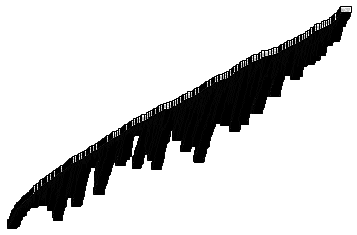

In [61]:
from sklearn import tree
tree.plot_tree(DTR3) 

In [64]:
#import graphviz

In [67]:
#dot_data = tree.export_graphviz(DTR3, out_file=None, 
#                      feature_names=data.feature_names,  
#                      class_names=data.target_names,  
#                    filled=True, rounded=True,  
#                     special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph